## Question No. 1: (Exploring data)

**i. How many training and test examples are there? How many positive and negative examples are there in the training dataset?**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import average_precision_score, precision_recall_curve,balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA


In [2]:
# How many training and test examples are there?
test = np.loadtxt('./Xtest.csv')
train = np.loadtxt('./Xtrain.csv')
ytrain = np.loadtxt('./Ytrain.csv')

test_num = sum(1 for row in test)
train_num = sum(1 for row in train)
print('The number of test is: ', test_num)
print('THe number of train is: ', train_num)

The number of test is:  3000
THe number of train is:  3000


In [3]:
# How many positive and negative examples are there in the training dataset?
print(type(ytrain))
n = np.sum(ytrain == 1)
print("positive examples",n)
n_ne = np.sum(ytrain == -1)
print("negative examples",n_ne)

<class 'numpy.ndarray'>
positive examples 611
negative examples 2389


**ii. Show at least 10 randomly selected objects of each class using plt.matshow by reshaping the flattened array to 28x28. What are your observations about the nature of the data? Also show 10 randomly selected objects from the test set. Do you see any issues in the data that may limit the generalization performance of your classifier?**


In the following I will use the positive instance to refer to data with a label of 1 and the negative instance to refer to data with a label of -1.

For example, the objects in the picture are both long-sleeved dresses, but one is classified as a positive instance and the other as a negative instance, so it may be difficult for the classifier to classify this part of the instances during training. This is why it may be difficult to classify this part of the instances. The negative instance contains more items, so it may not work as well when classifying.

In the test set, all the items in the test set are oriented positively, whereas in the train set the orientation of the items is variable and most of them are skewed, which may lead to the classifier not working well enough.

Postive:


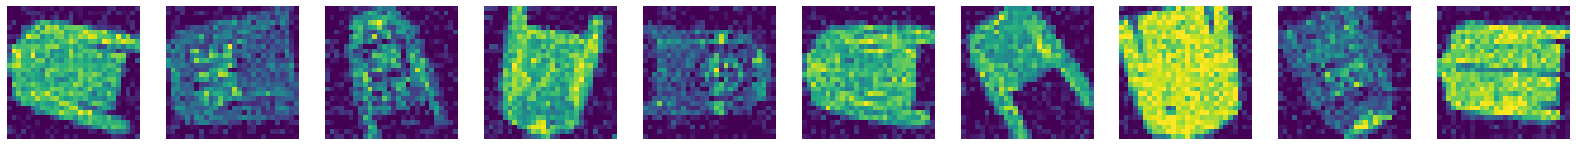

Negative:


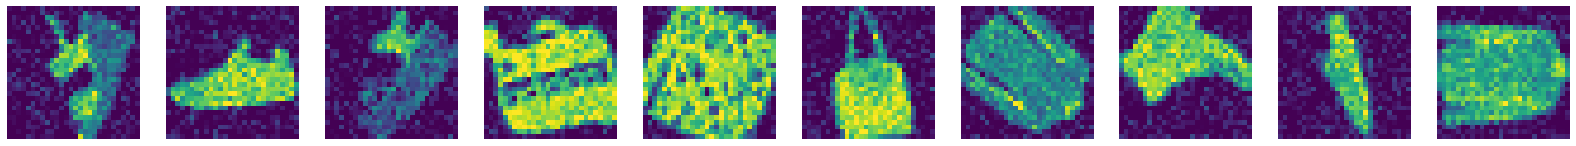

Test:


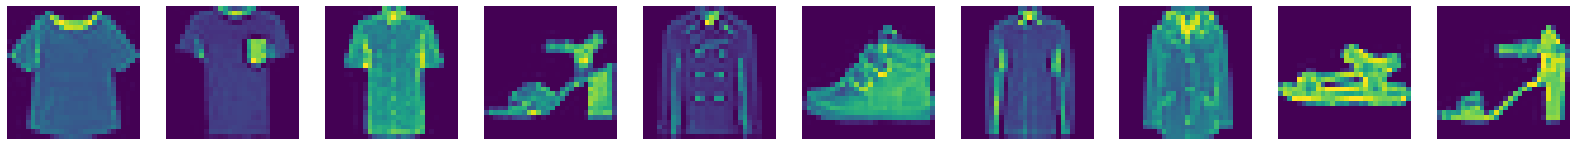

In [4]:
positive_instance=[]
negative_instance=[]
for index in range(len(ytrain)):
    if ytrain[index]==1:
        positive_instance.append(train[index])
    else:
        negative_instance.append(train[index])
positive_ramdom = random.sample(positive_instance, 10)
negative_ramdom = random.sample(negative_instance, 10)
test_ramdom=random.sample(test.tolist(), 10)

# display the random image from positive group
print("Postive:")
positive_ramdom= np.array(positive_ramdom).reshape(-1,28, 28)
fig,axs = plt.subplots(1, 10, figsize=(28, 28))
for i in range(10):
    axs[i].matshow(positive_ramdom[i])
    axs[i].axis('off')
plt.show()
# display the random image from negative group
print("Negative:")
negative_ramdom= np.array(negative_ramdom).reshape(-1,28, 28)
fig,axs = plt.subplots(1, 10, figsize=(28, 28))
for i in range(10):
    axs[i].matshow(negative_ramdom[i])
    axs[i].axis('off')
plt.show()
# display the random image from test group
print("Test:")
test_ramdom= np.array(test_ramdom).reshape(-1,28, 28)
fig,axs = plt.subplots(1, 10, figsize=(28, 28))
for i in range(10):
    axs[i].matshow(test_ramdom[i])
    axs[i].axis('off')
plt.show()

**iii. Which performance metric (e.g., accuracy, AUC-ROC and AUC-PR) should be used for this problem? Give the reasoning behind your choice(s).**

I consider four performance metrics below:

1.Accuracy：

The number of positive examples is significantly lower than the number of negative examples and accuracy may not be a reliable indicator for assessment. This is because, in this case, the model can achieve high accuracy simply by classifying all samples as negative.

2.AUC(Area under Curve)-PR（ Precision-recall curves）：

In this case, the AUC-PR is a useful metric. The larger the area under the curve, the better the performance of the classifier. precision is the number of true predictions divided by the total number of positive predictions made by the classifier, and recall is the number of true predictions divided by the total number of positive instances in the dataset. The curve shows the balance between precision and recall values for the classifier, with higher AUC-PR values indicating a better trade-off between precision and recall for the classifier, which is particularly useful when the cost of false negatives (i.e. failure to identify positive instances) is high. Although the cost of false negatives is not mentioned in this problem, the number of negative samples is much larger than the number of positive samples, so I think we should pay more attention to whether the positive samples are correctly classified, because with more negative samples, the classifier may tend to classify most of the samples as negative, but this may not be the situation in the real world.

3.AUC-ROC（receiveroperating characteristic）：

The AUC-ROC measures the ability of the Classifiers to distinguish between positive and negative instances. ROC curve provides an overall assessment of the classifier's performance by plotting the true positive rate and the false positive rate, the value of AUC-ROC represents the area formed by the ROC curve and the horizontal axis. Therefore, the larger the AUC-ROC, the larger the area under the curve and the more the curve bulges towards the upper left corner, the more effective the model is. Because both the TPR and FPR calculations in the ROC curve focus on TP, the ROC curve is more sensitive to positive samples, so I think this is one of the metrics worth considering, although it is not the best one.

4.Balanced accuracy：

Balanced accuracy is also a good choice because it calculates the average of sensitivity and specificity, i.e. it considers positive and negative classes equally and is therefore less affected by data imbalance.

In summary, of these metrics, only accuracy is not suitable for use with unbalanced datasets; the other three metrics also provide a comprehensive assessment of classifier performance.


**iv. What is the expected accuracy of a random classifier (one that generates random labels for a given example) for this problem over the training and test datasets? Demonstrate (either by a mathematical or statistical proof or a programming experiment) why this would be the case.**

In the code below I have written a random classifier which works by assigning a random label to the instances, 1 or -1. To avoid errors I run the random classifier ten times and calculate the average of the accuracies of the ten random classification results. Each time, a label was given to all instances random and the accuracy was calculated for that time.

In addition, from a mathematical point of view, p is the proportion of instances with a label of 1 in the data set, and 1-p is the proportion of instances with a label of -1 in the data set.

Expected accuracy = p* 0.5 + (1-p)* 0.5 = 0.5

So for the whole dataset, the accuracy of the random classifier should be about 0.5.

In [5]:
# Generate random labels for each example in the training datasets
def random_classifier(x):
    return np.random.choice([-1, 1], size=len(x))
sum_accuracy=0
for index in range(10):
    y_train_random=random_classifier(train)
    # Calculate the accuracy of the random classifier on the training and test datasets
    train_accuracy = accuracy_score(ytrain, y_train_random)
    sum_accuracy+=train_accuracy
print(sum_accuracy/10)

0.4979666666666668


**v. What is the AUC-ROC and AUC-PR of a random classifier for this problem over the training and test datasets? Demonstrate (either by a mathematical or statistical proof or a programming experiment) why this would be the case.**

Firstly, the ROC curve and the PR curve for both the training and test datasets should be straight lines.

AUC-ROC is measured using TPR and FPR. For a random classifier, since the probability of a sample being judged as positive or negative is the same, and TPR = TP / (TP + FN) and FPR = FP / (FP + TN), TPR and FPR are equal for all thresholds. The ROC curve is therefore represented in the image as a y = x function and the area under this function is 0.5.

The AUC-PR, on the other hand, was calculated using recall and precision because of the imbalance in the proportion of positive and negative samples, and the value of the AUC-PR is close to the proportion of positive instances (600/3000).

The ROC curve and PR curve are shown below with training datasets.
<!-- Precision = TP / (TP + FP)，Precision最高为1（所有positive 和 negative 实例都被正确判断，600/600)，最低为0.2(所有的实例都被判断为positive实例，600/3000)

Recall = TP / (TP + FN)，当Recall约等于0.5的时候Precision为0.2，这时 (TP + FP)/(TP + FN)=0.5/0.2，并且这个比例维持到Recall=1. -->

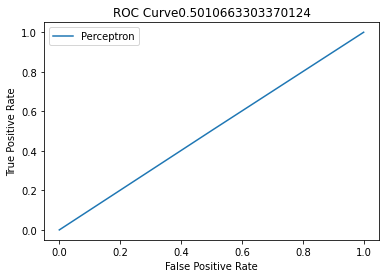

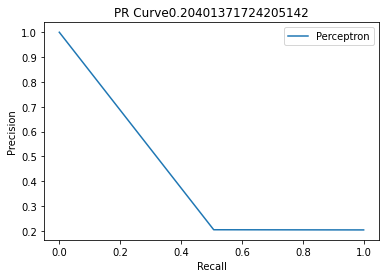

In [6]:
#ROC曲线绘制和AUC计算
def getAUCROC(ytrain, y_train_random):
    FPR, TPR, threshold = roc_curve(ytrain, y_train_random, pos_label=1)
    #AUC值计算
    AUC = auc(FPR, TPR)
    return AUC, FPR, TPR

def getAUCPR(y_true, y_score):
    precision, recall, tt = precision_recall_curve(y_true, y_score)
    auc_pr = average_precision_score(y_true, y_score)
    return recall, precision, auc_pr

def drawAUCPR(recall, precision, auc_pr):
    # Plotting ROC curves
    plt.plot(recall, precision, label='Perceptron')

    # Add labels and legends
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('PR Curve'+str(auc_pr))
    plt.legend()

    # Show graphs
    plt.show()

def drawAUCROC(fpr, tpr, roc_auc):
    # Plotting ROC curves
    plt.plot(fpr, tpr, label='Perceptron')

    # Add labels and legends
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve'+str(roc_auc))
    plt.legend()

    # Show graphs
    plt.show()

AUC, FPR, TPR = getAUCROC(ytrain, y_train_random)
drawAUCROC(FPR, TPR, AUC)
recall, precision, auc_pr = getAUCPR(ytrain, y_train_random)
drawAUCPR(recall, precision, auc_pr)


## Question No. 2: (Nearest Neighbor Classifier)

**i.
What is the accuracy, balanced accuracy, AUC-ROC and AUC-PR for each fold using this
classifier?**

In [7]:
# Make predictions on the validation data
def getPred(clf,Xv):
        y_pred = clf.predict_proba(Xv)
        y_predicted = []
        for index in range(len(y_pred)):
            if y_pred[index][0] >= y_pred[index][1]:
                y_predicted.append(-1)
            else:
                y_predicted.append(1)
        return y_predicted

In [8]:
#  5-fold stratified cross-validation
# Initialize StratifiedKFold with 5 splits and shuffle=True
skf = StratifiedKFold(n_splits=5, shuffle=True)

def getResultKNN(train,ytrain,k):
    balanced_accuracy_list=[]
    accuracy_list=[]
    auc_pr_list=[]
    auc_roc_list=[]
    
    AUC1,FPR1,TPR1=0,0,0
    recall1,precision1,auc_pr1=0,0,0

    # Loop through the folds
    for i, (tr_idx, v_idx) in enumerate(skf.split(train, ytrain)):
        Xtr, Xv = train[tr_idx], train[v_idx]
        ytr, yv = ytrain[tr_idx], ytrain[v_idx]
        # Initialize KNeighborsClassifier with k=3
        clf=KNeighborsClassifier(n_neighbors=k)
        # Fit the classifier on the training data
        clf.fit(Xtr, ytr)
        # Make predictions on the validation data
        y_predicted=getPred(clf,Xv)

    # 1. Accuracy    
    # Accuracy for class = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
        accuracy_list.append(accuracy_score(yv, y_predicted))

    # 2. balanced accuracy
        balanced_accuracy_list.append(balanced_accuracy_score(yv, y_predicted))

    # 3. AUCROC
        AUC1,FPR1,TPR1=getAUCROC(yv, y_predicted)
        auc_roc_list.append(AUC1)

    # 4. AUC-PR
        recall1,precision1,auc_pr1=getAUCPR(yv, y_predicted)
        auc_pr_list.append(auc_pr1)
    return balanced_accuracy_list,accuracy_list,auc_pr_list,auc_roc_list,AUC1,FPR1,TPR1,recall1,precision1,auc_pr1
balanced_accuracy_list,accuracy_list,auc_pr_list,auc_roc_list,AUC1,FPR1,TPR1,recall1,precision1,auc_pr1=getResultKNN(train,ytrain,3)

for i in range(len(balanced_accuracy_list)):
    print("Fold ", i+1)
    print("Accuracy: ", accuracy_list[i])
    print("Balanced Accuracy: ", balanced_accuracy_list[i])
    print("AUC-ROC:",auc_roc_list[i])
    print("AUC-PR:",auc_pr_list[i])

Fold  1
Accuracy:  0.8866666666666667
Balanced Accuracy:  0.8037245352904863
AUC-ROC: 0.8037245352904863
AUC-PR: 0.5662841530054644
Fold  2
Accuracy:  0.9016666666666666
Balanced Accuracy:  0.8528191233966664
AUC-ROC: 0.8528191233966664
AUC-PR: 0.6260765027322404
Fold  3
Accuracy:  0.8483333333333334
Balanced Accuracy:  0.7705089512312231
AUC-ROC: 0.7705089512312229
AUC-PR: 0.4722841530054645
Fold  4
Accuracy:  0.875
Balanced Accuracy:  0.8025070306605391
AUC-ROC: 0.8025070306605392
AUC-PR: 0.5395143959223033
Fold  5
Accuracy:  0.85
Balanced Accuracy:  0.757836068926727
AUC-ROC: 0.757836068926727
AUC-PR: 0.46879992930364084


**ii. Plot the ROC and PR curves for one fold. What are your observations about the ROC and
PR curves?**

1. ROC:

For many binary classification problems, a value between 0.8 and 0.9 is considered to be a good performance, and the above AUC-ROC value of 0.828 proves the reliability of the model. In addition to this, the TPR increases more until the FPR is less than 0.2 and is greater than 0.8 when the FPR is approximately equal to 0.2. This proves that the classifier is more effective in classifying POSITIVE examples.

2. PR:

From the results, the AUC-PR of this classifier is greater than 0.5, which is much greater than the 0.2 of the random classifier, so the results are not bad, but not very good.

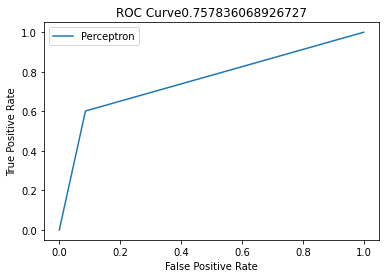

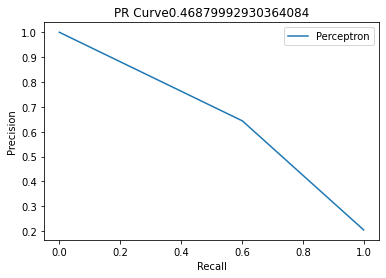

In [9]:
drawAUCROC(FPR1,TPR1,AUC1)
drawAUCPR(recall1,precision1,auc_pr1)

In [10]:
def printMetrics(accuracy_list,balanced_accuracy_list,auc_pr_list,auc_roc_list):
    # Calculate the average and standard deviation for each metric across all folds and show these in a single table.
    print("Name||Standardization||Mean")
    print("Accuracy","||",np.mean(accuracy_list),"||",np.std(accuracy_list))
    print("Balanced accuracy","||",np.mean(balanced_accuracy_list),"||",np.std(balanced_accuracy_list))
    print("AUC-PR","||",np.mean(auc_pr_list),"||",np.std(auc_pr_list))
    print("AUC-ROC","||",np.mean(auc_roc_list),"||",np.std(auc_roc_list))
printMetrics(accuracy_list,balanced_accuracy_list,auc_pr_list,auc_roc_list)

Name||Standardization||Mean
Accuracy || 0.8723333333333333 || 0.02072572207561307
Balanced accuracy || 0.7974791419011285 || 0.03294165319323273
AUC-PR || 0.5345918267938228 || 0.059344588881147596
AUC-ROC || 0.7974791419011285 || 0.03294165319323277


**iii. What is the impact of various forms of pre-processing
(https://scikit-learn.org/stable/modules/preprocessing.html ) (e.g., mean-standard
deviation or standard scaling or min-max scaling) on the cross-validation performance?
Show code to demonstrate the results and write a summary of your findings. Do any
pre-processing techniques improve predictive performance? Why do you think this is the
case?**

First of all, depending on the dataset, since the data to be processed is an image, Standardization, Min-max scaling or Normalization will work better, since the classifier is inputted as a binarized image file, unlike tabular data, which has a variety of features, and methods such as Encoding categorical features can be considered for the classification.

In order to compare the results more objectively, the classifiers used are all KNN classifiers (k=3), and I list the results after different pre-processing methods of re-classification, and all the metrics mentioned in (i). The results of the raw data in (i) will be used as a benchmark for comparison.

From the results, compared to the classification results of the original data, the accuracy decreased after pre-processing, but the balanced accuracy of the data processed by StandardScaler() and MinMaxScaler() increased, and the balanced accuracy, AUC-PR and AUC-ROC of the data processed by Normalizer() were all a little higher. And its accuracy was the best among the optimized results, not much different from the original data.  So Normalization pre-processing gives the best results, as this treatment is useful for this for algorithms that measure the distance between samples, and the KNN algorithm used in this case is one of them. The other two pre-processing methods may be more effective for other classifiers.

The drop in accuracy is acceptable because the data is unbalanced, so it does not explain the performance of the classifier very well, so my priority is to improve AUC-PR, then Balanced accuracy and AUC-ROC. For example, Normalizer() preprocessing makes the KNN algorithm more robust to the size of the feature values and helps to identify similarities between samples based on their orientation in the feature space, so it can better determine the label of an instance.

Pre-processing: mean-standard

StandardScaler: It centers the feature data by subtracting the mean and scaling to unit variance. This may be more useful for algorithms that assume zero mean and unit variance, such as linear regression and logistic regression.

In [11]:
def getAllmetric(yv, y_predicted):

    # 1. Accuracy
    accuracy = accuracy_score(yv, y_predicted)
    # 2. balanced accuracy
    balanced_accuracy = balanced_accuracy_score(yv, y_predicted)
    # 3. AUCROC
    AUC1, FPR1, TPR1 = getAUCROC(yv, y_predicted)
    # 4. AUC-PR
    recall1, precision1, auc_pr1 = getAUCPR(yv, y_predicted)
    return accuracy, balanced_accuracy, AUC1, auc_pr1


# Pre-processing using mean-standard deviation scaling
scaler = StandardScaler().fit(train)
X_mean_standard = scaler.transform(train)

accuracy_list_mean_standard, balanced_accuracy_list_mean_standard, auc_pr_list_mean_standard, auc_roc_list_mean_standard, AUC1_mean_standard, FPR1_mean_standard, TPR1_mean_standard, recall1_mean_standard, precision1_mean_standard, auc_pr1_mean_standard = getResultKNN(
    X_mean_standard, ytrain, 3)

Pre-processing: min-max scaling

MinMaxScaler: It scales the feature data to a specific range, usually [0,1]. It does this by subtracting the minimum value of the feature data and dividing by the range (max - min). This may be more useful for neural networks and support vector machines (SVMs).

In [12]:
# Pre-processing using min-max scaling
MinMax = MinMaxScaler()
x_train_minmax = MinMax.fit_transform(train)

accuracy_list_min_max, balanced_accuracy_list_min_max, auc_pr_list_min_max, auc_roc_list_min_max, AUC1_min_max, FPR1_min_max, TPR1_min_max, recall1_min_max, precision1_min_max, auc_pr_min_max = getResultKNN(
    x_train_minmax, ytrain, 3)


Pre-processing: Nomalization

Normalizer: It scales the feature data to have a unit norm. This means that after transforming the data, each sample will have a norm of 1. The Normalizer() preprocessing method is suitable for models that are sensitive to the magnitude of the feature values, such as distance-based algorithms like K-Nearest Neighbors (KNN) 

In [13]:
#Nomalization
Normal = Normalizer()
x_train_normalizer = Normal.fit_transform(train)

accuracy_list_Nomalization, balanced_accuracy_list_Nomalization, auc_pr_list_Nomalization, auc_roc_list_Nomalization, AUC1_min_max, FPR1_min_max, TPR1_min_max, recall1_min_max, precision1_min_max, auc_pr_min_max = getResultKNN(
    x_train_normalizer, ytrain, 3)


In [14]:
# Compare the accuracy score of the models
print("Mean metrics of original data:")
printMetrics(accuracy_list,balanced_accuracy_list,auc_roc_list,auc_pr_list)
print("======================================================")
print("Mean metrics of standardized data:")
printMetrics(accuracy_list_mean_standard,balanced_accuracy_list_mean_standard,auc_roc_list_mean_standard,auc_pr_list_mean_standard)
print("======================================================")
print("Mean metrics of min-max scaled data:")
printMetrics(accuracy_list_min_max,balanced_accuracy_list_min_max,auc_roc_list_min_max,auc_pr_list_min_max)
print("======================================================")
print("Mean metrics of Nomalizated data:")
printMetrics(accuracy_list_Nomalization,balanced_accuracy_list_Nomalization,auc_roc_list_Nomalization,auc_pr_list_Nomalization)
print("======================================================")

Mean metrics of original data:
Name||Standardization||Mean
Accuracy || 0.8723333333333333 || 0.02072572207561307
Balanced accuracy || 0.7974791419011285 || 0.03294165319323273
AUC-PR || 0.7974791419011285 || 0.03294165319323277
AUC-ROC || 0.5345918267938228 || 0.059344588881147596
Mean metrics of standardized data:
Name||Standardization||Mean
Accuracy || 0.8047987327704288 || 0.020907855690057327
Balanced accuracy || 0.8783333333333335 || 0.015018507101425086
AUC-PR || 0.8047987327704286 || 0.020907855690057323
AUC-ROC || 0.550080564383278 || 0.04325038022474783
Mean metrics of min-max scaled data:
Name||Standardization||Mean
Accuracy || 0.7887988988329653 || 0.014358693362309776
Balanced accuracy || 0.8673333333333334 || 0.014243907079481017
AUC-PR || 0.7887988988329653 || 0.014358693362309724
AUC-ROC || 0.519153272083577 || 0.03398182425829485
Mean metrics of Nomalizated data:
Name||Standardization||Mean
Accuracy || 0.8543530413768898 || 0.013524932187458238
Balanced accuracy || 0.87

## Question No. 3: CV

i. Write your strategy for selecting the optimal classifier. Show code to demonstrate the results for each classifier.

I will construct the optimal classifier based on the following aspects of analysis.

1. the type of data to be processed:

First, the type of data to be processed should be considered. In this case, the data to be processed is image data, which may be suitable for classifiers such as Support Vector Machines (SVM), Convolutional Neural Networks (CNN), K-Nearest Neighbors (KNN), Random Forest, Naive Bayes, etc. The problem requires finding the best classifier among Perceptron, Naïve Bayes Classifier, Linear SVM and Kernelized SVM, so this step is skipped.


2. Target metrics:

Next, the distribution of the dataset is considered. If the number of instances in one class far exceeds the instances in other class, in this unbalanced situation, I prefer to choose metrics such as Balanced accuracy, AUC-ROC as the criteria for comparison. At the same time, the environment in which the classifier is working needs to be considered, which is the particular problem it is responsible for. For example, if the aim of the classifier in this problem is to classify as many tops clothes as possible, it will be more important that positive instances are classified correctly, then choosing TPR as the target metric may be more useful, but if the aim of the classifier in this problem is to classify as many negative instances correctly as possible, then accuracy can be the target metric. Sometimes some classifiers perform better at getting higher accuracy, and some classifiers perform better at getting higher AUC-ROC, balanced accuracy, etc., and this is when the classifier is chosen according to the desired metric.

3. Size and complexity of the dataset:

In addition, the size of the dataset can affect the choice of classifier: for small datasets with a limited number of features and classes, simple classifiers such as plain Bayes or KNN may be effective, and these classifiers are relatively easy to train. For larger datasets with more complex features and classes, on the other hand, more advanced classifiers such as SVM may be more appropriate. These classifiers can handle high-dimensional data.

4. The way in which the data is pre-processed:

In addition, the way in which the data is pre-processed needs to be matched to the classifier so that the data can be better processed.

5. Tuning the hyperparameters of the classifier:

Finally, tuning the parameters of the classifier is also important for finding the optimal classifier. I will use GridSearchCV to find the best parameters for the model. By default, GridSearchCV uses the mean absolute error, the value of auc-pr is low due to data imbalance, so "average_precision" is used as the target metric to find the most appropriate hyperparameter.


In the following classifer demonstration, I will use AUC-ROC and balanced accuracy as the target metric and pre-process each classifier according to its characteristic. Because the class, feather and size of the dataset are small, KNN is theoretically more appropriate and the results are the same in practice.

**Perceptron**

For this classifier, the three parameters **penalty**, **alpha**, and **l1_ratio** are considered for optimisation.

In [15]:
param_grid = {
    'alpha': [
        1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
        1e-4, 1e-3, 1e-2, 1e-1, 1, 10
    ],
    "penalty": ["l1", "l2", "elasticnet"],
    "l1_ratio": [0, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
}
model_perceptron = Perceptron()
gsearch = GridSearchCV(model_perceptron, param_grid,scoring="average_precision", n_jobs=-1, cv=5)
gsearch.fit(X_mean_standard, ytrain)

# 打印结果
print("Best parameters: ", gsearch.best_params_)

Best parameters:  {'alpha': 1e-05, 'l1_ratio': 0, 'penalty': 'l2'}


In [16]:
def getResultPerceptron(train_data, label_train_data, alpha_patar,
                        l1_ratio_patar, penalty_patar):
    accuracy_list_Perceptron = []
    balanced_accuracy_list_Perceptron = []
    auc_roc_list_Perceptron = []
    auc_pr_list_Perceptron = []

    AUC_Perceptron, FPR_Perceptron, TPR_Perceptron, tt_Perceptron = 0, 0, 0, 0
    recall_Perceptron, precision_Perceptron, auc_pr_Perceptron, thread_Perceptron = 0, 0, 0, 0
    # Loop through the folds
    for i, (tr_idx, v_idx) in enumerate(skf.split(train_data,
                                                  label_train_data)):
        Xtr, Xv = train_data[tr_idx], train_data[v_idx]
        ytr, yv = label_train_data[tr_idx], label_train_data[v_idx]

        # Train the Perceptron classifier
        ppn = Perceptron(alpha=alpha_patar,
                         l1_ratio=l1_ratio_patar,
                         penalty=penalty_patar)
        ppn.fit(Xtr, ytr)

        # Get the predicted results
        y_predicted = ppn.predict(Xv)

        accuracy_Perceptron, balanced_accuracy_Perceptron, AUC_Perceptron, auc_pr_Perceptron = getAllmetric(
            yv, y_predicted)
        accuracy_list_Perceptron.append(accuracy_Perceptron)
        balanced_accuracy_list_Perceptron.append(balanced_accuracy_Perceptron)
        auc_roc_list_Perceptron.append(AUC_Perceptron)
        auc_pr_list_Perceptron.append(auc_pr_Perceptron)
        # AUCROC
        AUC_Perceptron, FPR_Perceptron, TPR_Perceptron = getAUCROC(
            yv, y_predicted)
        # AUC-PR
        recall_Perceptron, precision_Perceptron, auc_pr_Perceptron = getAUCPR(
            yv, y_predicted)
    return accuracy_list_Perceptron, balanced_accuracy_list_Perceptron, auc_roc_list_Perceptron, auc_pr_list_Perceptron, AUC_Perceptron, FPR_Perceptron, TPR_Perceptron, recall_Perceptron, precision_Perceptron, auc_pr_Perceptron


accuracy_list_Perceptron_mean_standard, balanced_accuracy_list_Perceptron_mean_standard, auc_roc_list_Perceptron_mean_standard, auc_pr_list_Perceptron_mean_standard, AUC_Perceptron_mean_standard, FPR_Perceptron_mean_standard, TPR_Perceptron_mean_standard, recall_Perceptron_mean_standard, precision_Perceptron_mean_standard, auc_pr_Perceptron_mean_standard = getResultPerceptron(
    X_mean_standard, ytrain, 0.0001, 0.1, 'elasticnet')


**Naïve Bayes Classifier**

The Bayesian classifier does not have many parameters to tune, only var_smoothing, which I chose as the default value of 1e-9. The growth space for this classifier is not too large.

In [17]:
def getResultGaussianNB(train_data, label_train_data):
    accuracy_list_GaussianNB = []
    balanced_accuracy_list_GaussianNB = []
    auc_roc_list_GaussianNB = []
    auc_pr_list_GaussianNB = []

    AUC_GaussianNB, FPR_GaussianNB, TPR_GaussianNB, tt_GaussianNB = 0, 0, 0, 0
    recall_GaussianNB, precision_GaussianNB, auc_pr_GaussianNB, thread_GaussianNB = 0, 0, 0, 0
    # Loop through the folds
    for i, (tr_idx, v_idx) in enumerate(skf.split(train_data,
                                                  label_train_data)):
        Xtr, Xv = train_data[tr_idx], train_data[v_idx]
        ytr, yv = label_train_data[tr_idx], label_train_data[v_idx]

        # Initialize the GaussianNB classifier
        gnb = GaussianNB()

        # Fit the classifier to the training data
        gnb.fit(Xtr, ytr)

        # Predict the labels of the test data
        y_pred_GaussianNB = gnb.predict(Xv)

        accuracy_GaussianNB, balanced_accuracy_GaussianNB, AUC_GaussianNB, auc_pr_GaussianNB = getAllmetric(
            yv, y_pred_GaussianNB)
        accuracy_list_GaussianNB.append(accuracy_GaussianNB)
        balanced_accuracy_list_GaussianNB.append(balanced_accuracy_GaussianNB)
        auc_roc_list_GaussianNB.append(AUC_GaussianNB)
        auc_pr_list_GaussianNB.append(auc_pr_GaussianNB)
        # AUCROC
        AUC_GaussianNB, FPR_GaussianNB, TPR_GaussianNB = getAUCROC(
            yv, y_pred_GaussianNB)
        # AUC-PR
        recall_GaussianNB, precision_GaussianNB, auc_pr_GaussianNB = getAUCPR(
            yv, y_pred_GaussianNB)
    return accuracy_list_GaussianNB, balanced_accuracy_list_GaussianNB, auc_roc_list_GaussianNB, auc_pr_list_GaussianNB, AUC_GaussianNB, FPR_GaussianNB, TPR_GaussianNB, recall_GaussianNB, precision_GaussianNB, auc_pr_GaussianNB


accuracy_list_GaussianNB_mean_standard, balanced_accuracy_list_GaussianNB_mean_standard, auc_roc_list_GaussianNB_mean_standard, auc_pr_list_GaussianNB_mean_standard, AUC_GaussianNB_mean_standard, FPR_GaussianNB_mean_standard, TPR_GaussianNB_mean_standard, recall_GaussianNB_mean_standard, precision_GaussianNB_mean_standard, auc_pr_GaussianNB_mean_standard = getResultGaussianNB(
    X_mean_standard, ytrain)


**Linear SVM**

The optimized parameters are penalty, loss, tol and C.

In [18]:
param_grid = {
    'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10],
    'C': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4],
    "penalty": ["l1", "l2"],
    "loss": ["hinge", "squared_hinge"]
}

linearSVC = LinearSVC()

#use grid serach CV to calcualte the best setting
gsearch = GridSearchCV(linearSVC, param_grid,scoring="average_precision", cv=5)
gsearch.fit(x_train_minmax, ytrain)

# 打印结果
print("Best parameters: ", gsearch.best_params_)

C:\Users\hongj\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hongj\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hongj\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\hongj\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py", line 974, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\hongj\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py", line 830, in _get_liblinear_solver_type
    raise ValueError('Unsupported s

Best parameters:  {'C': 0.0001, 'loss': 'squared_hinge', 'penalty': 'l2', 'tol': 10}


C:\Users\hongj\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan 0.13392772 0.13392772 0.13392772 0.13392772 0.13393084
 0.13392772 0.13392772        nan        nan        nan        nan
        nan        nan        nan 0.13394032 0.13394032 0.13394032
 0.13393455 0.13393498 0.13393766 0.13393455        nan        nan
        nan        nan        nan        nan        nan 0.13392772
 0.13392772 0.13392772 0.13392772 0.13392772 0.13392772 0.13392772
        nan        nan        nan        nan        nan        nan
        nan 0.13402351 0.13402351 0.13402351 0.13402351 0.13397737
 0.13397618 0.13397811        nan        nan        nan        nan
        nan        nan        nan 0.13392772 0.13392772 0.13392772
 0.13392772 0.13392772 0.13392772 0.13392772        nan        nan
        nan        nan        nan  

In [19]:
def getResultLinearSVC(train_data, label_train_data, C_patar, loss_patar,
                       penalty_patar, tol_patar):

    accuracy_list_LinearSVC = []
    balanced_accuracy_list_LinearSVC = []
    auc_roc_list_LinearSVC = []
    auc_pr_list_LinearSVC = []

    AUC_LinearSVC, FPR_LinearSVC, TPR_LinearSVC, tt_LinearSVC = 0, 0, 0, 0
    recall_LinearSVC, precision_LinearSVC, auc_pr_LinearSVC, thread_LinearSVC = 0, 0, 0, 0
    # Loop through the folds
    for i, (tr_idx, v_idx) in enumerate(skf.split(train_data,
                                                  label_train_data)):
        Xtr, Xv = train_data[tr_idx], train_data[v_idx]
        ytr, yv = label_train_data[tr_idx], label_train_data[v_idx]

        # Create a Linear SVM classifier
        linearSVC = LinearSVC(C=C_patar,
                              loss=loss_patar,
                              penalty=penalty_patar,
                              tol=tol_patar)

        # Fit the classifier to the data
        linearSVC.fit(Xtr, ytr)

        # Predict the class labels for new samples
        y_pred_LinearSVC = linearSVC.predict(Xv)

        accuracy_LinearSVC, balanced_accuracy_LinearSVC, AUC_LinearSVC, auc_pr_LinearSVC = getAllmetric(
            yv, y_pred_LinearSVC)
        accuracy_list_LinearSVC.append(accuracy_LinearSVC)
        balanced_accuracy_list_LinearSVC.append(balanced_accuracy_LinearSVC)
        auc_roc_list_LinearSVC.append(AUC_LinearSVC)
        auc_pr_list_LinearSVC.append(auc_pr_LinearSVC)
        # AUCROC
        AUC_LinearSVC, FPR_LinearSVC, TPR_LinearSVC = getAUCROC(
            yv, y_pred_LinearSVC)
        # AUC-PR
        recall_LinearSVC, precision_LinearSVC, auc_pr_LinearSVC = getAUCPR(
            yv, y_pred_LinearSVC)
    return accuracy_list_LinearSVC, balanced_accuracy_list_LinearSVC, auc_roc_list_LinearSVC, auc_pr_list_LinearSVC, AUC_LinearSVC, FPR_LinearSVC, TPR_LinearSVC, recall_LinearSVC, precision_LinearSVC, auc_pr_LinearSVC


accuracy_list_LinearSVC_mean_standard, balanced_accuracy_list_LinearSVC_mean_standard, auc_roc_list_LinearSVC_mean_standard, auc_pr_list_LinearSVC_mean_standard, AUC_LinearSVC_mean_standard, FPR_LinearSVC_mean_standard, TPR_LinearSVC_mean_standard, recall_LinearSVC_mean_standard, precision_LinearSVC_mean_standard, auc_pr_LinearSVC_mean_standard = getResultLinearSVC(
    X_mean_standard, ytrain, 0.0001, 'squared_hinge', 'l2', 1)


**Kernelized SVM**

The parameter for optimisation is:

C: this parameter determines the degree of tolerance to error, the larger it is, the less tolerance to error and the more generalisable the model will be.

kernel: This parameter determines which kernel function to use, commonly 'linear', 'poly', 'rbf', 'sigmoid' etc.

degree: If a polynomial kernel function is used, this parameter determines the number of polynomials, the larger it is, the higher the complexity of the model.

In [20]:
model_svc = SVC()

# Set the list of parameters to be optimised
param_grid = {
    'degree': [i for i in range(0, 5)],
    'coef0': [1e-2, 1e-1, 1, 10],
    "kernel": ['poly', "linear", 'rbf']
}

# Cross-validation of models using GridSearchCV
grid_search = GridSearchCV(model_svc, param_grid,scoring="average_precision", cv=5)
grid_search.fit(X_mean_standard, ytrain)

# Print optimal parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'coef0': 0.1, 'degree': 2, 'kernel': 'poly'}


In [21]:
def getResultSVC(train_data, label_train_data, coef0_patar, degree_patar,
                 kernel_patar):
    accuracy_list_SVC = []
    balanced_accuracy_list_SVC = []
    auc_roc_list_SVC = []
    auc_pr_list_SVC = []

    AUC_SVC, FPR_SVC, TPR_SVC = 0, 0, 0
    recall_SVC, precision_SVC, auc_pr_SVC = 0, 0, 0

    # Loop through the folds
    for i, (tr_idx, v_idx) in enumerate(skf.split(train_data,
                                                  label_train_data)):
        Xtr, Xv = train_data[tr_idx], train_data[v_idx]
        ytr, yv = label_train_data[tr_idx], label_train_data[v_idx]
        svc = SVC(coef0=coef0_patar, degree=degree_patar, kernel=kernel_patar)
        svc.fit(Xtr, ytr)

        # Predict the class labels for new samples
        y_pred_SVC = svc.predict(Xv)

        accuracy_SVC, balanced_accuracy_SVC, AUC_SVC, auc_pr_SVC = getAllmetric(
            yv, y_pred_SVC)
        accuracy_list_SVC.append(accuracy_SVC)
        balanced_accuracy_list_SVC.append(balanced_accuracy_SVC)
        auc_roc_list_SVC.append(AUC_SVC)
        auc_pr_list_SVC.append(auc_pr_SVC)
        # AUCROC
        AUC_SVC, FPR_SVC, TPR_SVC = getAUCROC(yv, y_pred_SVC)
        # AUC-PR
        recall_SVC, precision_SVC, auc_pr_SVC = getAUCPR(yv, y_pred_SVC)
    return accuracy_list_SVC, balanced_accuracy_list_SVC, auc_roc_list_SVC, auc_pr_list_SVC, AUC_SVC, FPR_SVC, TPR_SVC, recall_SVC, precision_SVC, auc_pr_SVC


accuracy_list_SVC_mean_standard, balanced_accuracy_list_SVC_mean_standard, auc_roc_list_SVC_mean_standard, auc_pr_list_SVC_mean_standard, AUC_SVC_mean_standard, FPR_SVC_mean_standard, TPR_SVC_mean_standard, recall_SVC_mean_standard, precision_SVC_mean_standard, auc_pr_SVC_mean_standard = getResultSVC(
    X_mean_standard, ytrain, 0.1, 2, 'poly')


In [22]:
def printaAccuracy(auc_roc_list,auc_pr_list,balanced_accuracy_list):
    # Calculate the average and standard deviation for each metric across all folds and show these in a single table.
    print("Name||Standardization||Mean")
    print("AUC-ROC","||",np.mean(auc_roc_list),"||",np.std(auc_roc_list))
    print("AUC-PR","||",np.mean(auc_pr_list),"||",np.std(auc_pr_list))
    print("Balanced Accuracy","||",np.mean(balanced_accuracy_list),"||",np.std(balanced_accuracy_list))

**ii. Show the comparison of these classifiers using a single consolidated table.**

From the results, Linear SVM and Kernelized SVM performed significantly better than the others when dealing with mean_standard data, while Perceptron and Naïve Bayes Classifier performed less well. At the same time, these classifiers are all less effective than the KNN classifier.

In [23]:
# Compare the accuracy score of the models
print("Metrics of Perceptron:")
printaAccuracy(auc_roc_list_Perceptron_mean_standard,auc_pr_list_Perceptron_mean_standard,balanced_accuracy_list_Perceptron_mean_standard)
print("======================================================")
print("Metrics of Naïve Bayes Classifier:")
printaAccuracy(auc_roc_list_GaussianNB_mean_standard,auc_pr_list_GaussianNB_mean_standard,balanced_accuracy_list_GaussianNB_mean_standard)
print("======================================================")
print("Metrics of Linear SVM:")
printaAccuracy(auc_roc_list_LinearSVC_mean_standard,auc_pr_list_LinearSVC_mean_standard,balanced_accuracy_list_LinearSVC_mean_standard)
print("======================================================")
print("Metrics of Kernelized SVM:")
printaAccuracy(auc_roc_list_SVC_mean_standard,auc_pr_list_SVC_mean_standard,balanced_accuracy_list_SVC_mean_standard)
print("======================================================")
print("Metrics of KNN Classifier:")
printaAccuracy(auc_roc_list_Nomalization,auc_pr_list_Nomalization,balanced_accuracy_list_Nomalization)
print("======================================================")

Metrics of Perceptron:
Name||Standardization||Mean
AUC-ROC || 0.7288571007918684 || 0.04095247474289367
AUC-PR || 0.39432914034544436 || 0.05112123854059424
Balanced Accuracy || 0.7288571007918684 || 0.040952474742893624
Metrics of Naïve Bayes Classifier:
Name||Standardization||Mean
AUC-ROC || 0.7487329805146266 || 0.02128900459288302
AUC-PR || 0.3777450038874293 || 0.022589952060612855
Balanced Accuracy || 0.7487329805146266 || 0.021289004592883045
Metrics of Linear SVM:
Name||Standardization||Mean
AUC-ROC || 0.8089176658836565 || 0.011240017295177504
AUC-PR || 0.4732648133400336 || 0.017036299466069525
Balanced Accuracy || 0.8089176658836565 || 0.011240017295177518
Metrics of Kernelized SVM:
Name||Standardization||Mean
AUC-ROC || 0.7515374792689697 || 0.009270766801873486
AUC-PR || 0.5096101883975328 || 0.008996497612587443
Balanced Accuracy || 0.7515374792689697 || 0.009270766801873461
Metrics of KNN Classifier:
Name||Standardization||Mean
AUC-ROC || 0.8543530413768897 || 0.01352493

**iii. Plot the ROC curves of all classifiers on the same axes for easy comparison.**

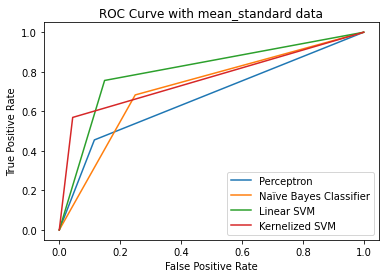

Name||AUC-ROC
Perceptron|| 0.6699902848085084
Naïve Bayes Classifier|| 0.7167254691414839
Linear SVM|| 0.8036253004039474
Kernelized SVM|| 0.7625402669121031


In [24]:
# Plotting ROC curves
plt.plot(FPR_Perceptron_mean_standard, TPR_Perceptron_mean_standard, label='Perceptron')
plt.plot(FPR_GaussianNB_mean_standard, TPR_GaussianNB_mean_standard, label='Naïve Bayes Classifier')
plt.plot(FPR_LinearSVC_mean_standard, TPR_LinearSVC_mean_standard, label='Linear SVM')
plt.plot(FPR_SVC_mean_standard, TPR_SVC_mean_standard, label='Kernelized SVM')

# Add labels and legends
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with mean_standard data')
plt.legend()

# Show graphs
plt.show()

print("Name||AUC-ROC")
print("Perceptron||",AUC_Perceptron_mean_standard)
print("Naïve Bayes Classifier||",AUC_GaussianNB_mean_standard)
print("Linear SVM||",AUC_LinearSVC_mean_standard)
print("Kernelized SVM||",AUC_SVC_mean_standard)
print("==================================")

**iv. Plot the PR curves of all classifier on the same axes for comparison.**

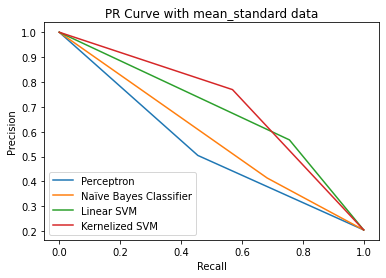

Name||AUC-PR
Perceptron|| 0.34135977440855486
Naïve Bayes Classifier|| 0.34759041211101765
Linear SVM|| 0.4787626412849494
Kernelized SVM|| 0.5261069418386491


In [25]:
# Plotting ROC curves
plt.plot(recall_Perceptron_mean_standard, precision_Perceptron_mean_standard, label='Perceptron')
plt.plot(recall_GaussianNB_mean_standard, precision_GaussianNB_mean_standard, label='Naïve Bayes Classifier')
plt.plot(recall_LinearSVC_mean_standard, precision_LinearSVC_mean_standard, label='Linear SVM')
plt.plot(recall_SVC_mean_standard, precision_SVC_mean_standard, label='Kernelized SVM')

# Add labels and legends
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve with mean_standard data')
plt.legend()

# Show graphs
plt.show()

print("Name||AUC-PR")
print("Perceptron||",auc_pr_Perceptron_mean_standard)
print("Naïve Bayes Classifier||",auc_pr_GaussianNB_mean_standard)
print("Linear SVM||",auc_pr_LinearSVC_mean_standard)
print("Kernelized SVM||",auc_pr_SVC_mean_standard)
print("==================================")

**v. Write your observations about the ROC and PR curves**

Looking at the graphs, the Kernelized SVM outperforms the other classifiers.

Firstly, considering the value of the AUC-ROC and AUC-PR, the data for the Kernelized SVM are both larger than those for the other classifiers, which indicates that it performs better.
Secondly, the shape of the curve is considered. In the ROC curve, the Kernelized SVM's curve is most convex towards the upper left corner, which indicates that it has a higher TPR at a lower FPR and the classifier performs better.

The worst classifier was the Naïve Bayes Classifier, both in terms of curve shape and the value of the AUC-ROC and AUC-PR.

Linear SVM and Perceptron performed similarly.

## Question No. 4 PCA

**i. Reduce the number of dimensions of the training data using PCA to 2 and plot a scatter plot of the training data showing examples of each class in a different color. What are your observations about the data based on this plot?**

Firstly, in both dimensions, the distribution of positive instance and negative instance in the train has a high overlap, with roughly the same area of distribution. This may have some influence on the classifier's prediction of the label of instance, so a higher component number needs to be chosen during training.

Then, the distribution densities of the positive instance and the negative instance are different. When the PC1 is approximately greater than 500, there are more points with a label of 1, and when the PC1 is approximately less than 500, there are more points with a label of -1. Also, for samples with label 1, when PC1 is equal to 0, the samples are more concentrated in the range of PC2 values in [1000,-750], and this range shrinks as PC1 shrinks, while at PC1>0, the samples are more evenly distributed regardless of the PC2 value.

For the -1 label, the samples are more concentrated in the range [1750,-2000] with PC1 equal to 0, and this range also decreases with PC1. In addition, the number of samples in this part of the range is higher, and there is a clear overlap in the distribution of samples, while the distribution of samples is more even but smaller when PC1 is greater than 0. In addition, when PC1 is greater than 1200, it is clear that the number of samples with a label of 1 is greater than the number of samples with a label of -1. So when PC1 is less than 0, the samples are more likely to belong to -1, while when PC1 is greater than 1200, the samples are more likely to belong to 1.

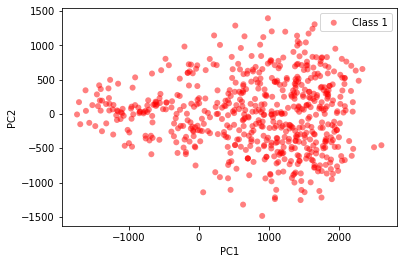

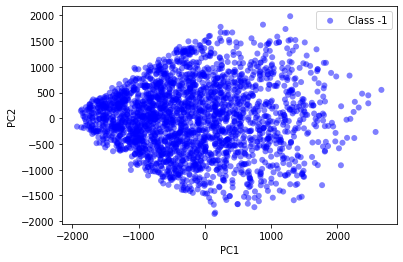

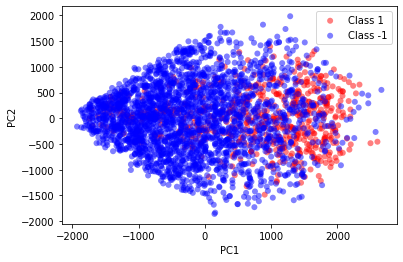

In [26]:
# Reduce the number of dimensions of the training data using PCA to 2
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train)

# plot three scatter plots of the training data showing examples of each class in a different color
plt.scatter(train_pca[ytrain == 1, 0],
            train_pca[ytrain == 1, 1],
            edgecolor='none',
            alpha=0.5,
            c='red',
            label='Class 1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

plt.scatter(train_pca[ytrain == -1, 0],
            train_pca[ytrain == -1, 1],
            edgecolor='none',
            alpha=0.5,
            c='blue',
            label='Class -1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

plt.scatter(train_pca[ytrain == 1, 0],
            train_pca[ytrain == 1, 1],
            edgecolor='none',
            alpha=0.5,
            c='red',
            label='Class 1')
plt.scatter(train_pca[ytrain == -1, 0],
            train_pca[ytrain == -1, 1],
            edgecolor='none',
            alpha=0.5,
            c='blue',
            label='Class -1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

**ii. Reduce the number of dimensions of the training and test data together using PCA to 2 and plot a scatter plot of the training and test data showing examples of each set in a different color (or marker style). What are your observations about the data based on this plot?**

From the figure, it can be seen that the test data and the training data have similar distribution shapes in the PC1 and PC2 dimensions, and many samples overlap, which indicates that the model trained with the training data can effectively predict the label of the test data when the component number=2.

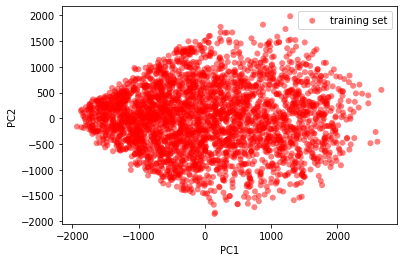

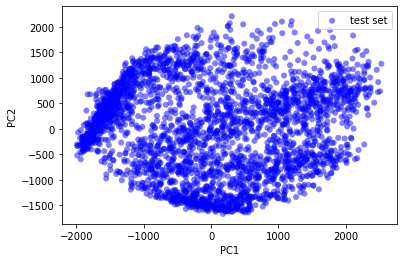

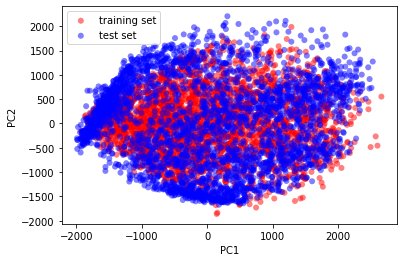

In [27]:
# Reduce the number of dimensions of the test data using PCA to 2
pca = PCA(n_components=2)
test_pca = pca.fit_transform(test)

plt.scatter(train_pca[:, 0],
            train_pca[:, 1],
            c='red',
            edgecolor='none',
            alpha=0.5,
            label='training set')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

plt.scatter(test_pca[:, 0],
            test_pca[:, 1],
            c='blue',
            edgecolor='none',
            alpha=0.5,
            label='test set')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

plt.scatter(train_pca[:, 0],
            train_pca[:, 1],
            c='red',
            edgecolor='none',
            alpha=0.5,
            label='training set')
plt.scatter(test_pca[:, 0],
            test_pca[:, 1],
            c='blue',
            edgecolor='none',
            alpha=0.5,
            label='test set')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

**iii. Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set.**

A scree plot is a graphical representation of the eigenvalues of the principal components (PCs) in principal component analysis (PCA). eigenvalues in PCA are values that measure the explained variance of each PC and give us an idea of the amount of information captured by each PC. After the initial 6 PCs, the eigenvalues drop off sharply, but then there are a number of principal components that account for approximately 0.017, so the final number of retained principal components is 13. The remaining features had a similar impact on the outcome.

The number of dimensions that explain 95% variance in the training set is 315.

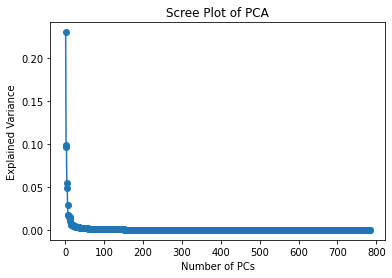

In [28]:
pca_train = PCA()
pca_train.fit(train)

# Get the explained variance of each PC
explained_variance = pca_train.explained_variance_ratio_

# Plot the explained variance of each PC
plt.plot(range(1, len(explained_variance) + 1), explained_variance, '-o')
plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')
plt.title('Scree Plot of PCA')
plt.show()

In [29]:
target_variance=0.95

index=0
while target_variance>0:
    target_variance=target_variance-explained_variance[index]
    index=index+1
print(index+1)

315


In [50]:
for i in range(15):
    print(explained_variance[i])

0.2303894471020768
0.09912233095938582
0.09688872002107596
0.0544902585049268
0.04850629438465756
0.02914094254390009
0.017699568469827155
0.017164068363444147
0.015808118557201486
0.015432822560344082
0.015091405376294885
0.014260372992801989
0.01097959908102683
0.007114294134620401
0.006651162904875694


**iv. Reduce the number of dimensions of the data using PCA and perform classification. What is the (optimal) cross-validation performance of a Kernelized SVM classification with PCA? Remember to perform hyperparameter optimization!**

1. Data pre-processing

First, I use StandardScaler(), MinMaxScaler(), and Normalizer() to pre-process the data.

2. PCA dimensionality reduction

Because of the image in question (iii), first I converted the high-dimensional dataset to a low-dimensional dataset with n_components of 13.

3. Model parameters

After pre-processing, I used GridSearchCV() to adjust the parameters between the processed data.

After comparing the different treatments, it can be found that the data was first pre-processed with Normalizer() and then the best hyperparameters were found after using PCA to downscale the data to component number=13. The best final results were found, but the AUC-PR results were similar after the different pre-processing.

The optimal cross-validation performance of a Kernelized SVM classification with PCA is below:

Name||Standardization||Mean

AUC-ROC || 0.8077765685038493 || 0.010892947914315087

AUC-PR || 0.5235887124782612 || 0.019176503087789603

Balanced Accuracy || 0.8077765685038493 || 0.010892947914315046


**StandardScaler()**

In [51]:
# Pre-processing using mean-standard deviation scaling
pca = PCA(n_components=13)
train_pca_5_mean_standard = pca.fit_transform(X_mean_standard)

model_svc = SVC()

# Set the list of parameters to be optimised
param_grid = {
    'degree': [i for i in range(0, 5)],
    'coef0': [1e-2, 1e-1, 1, 10],
    "kernel": ['poly', "linear", 'rbf']
}

# Cross-validation of models using GridSearchCV
grid_search = GridSearchCV(model_svc, param_grid,scoring='average_precision', cv=5)
grid_search.fit(train_pca_5_mean_standard, ytrain)

# Print optimal parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'coef0': 1, 'degree': 4, 'kernel': 'poly'}


In [54]:
auc_roc_list_SVC_4 = []
balanced_accuracy_list_SVC_4 = []
auc_pr_list_SVC_4 = []

accuracy_list_SVC_4, balanced_accuracy_list_SVC_4, auc_roc_list_SVC_4, auc_pr_list_SVC_4, _, _, _, _, _, _ = getResultSVC(
    train_pca_5_mean_standard, ytrain, 1, 4, 'poly')


In [55]:
print("Metrics of Kernelized SVM:")
printaAccuracy(auc_roc_list_SVC_4,auc_pr_list_SVC_4,balanced_accuracy_list_SVC_4)
print("======================================================")

Metrics of Kernelized SVM:
Name||Standardization||Mean
AUC-ROC || 0.7645752563600929 || 0.024576759810251276
AUC-PR || 0.5032408429639288 || 0.05023421223775017
Balanced Accuracy || 0.7645752563600929 || 0.024576759810251293


**MinMaxScaler()**

In [56]:
# Pre-processing using min-max scaling
pca = PCA(n_components=13)
x_train_minmax_5 = pca.fit_transform(x_train_minmax)

model_svc = SVC()

# Set the list of parameters to be optimised
param_grid = {
    'degree': [i for i in range(0, 5)],
    'coef0': [1e-2, 1e-1, 1, 10],
    "kernel": ['poly', "linear", 'rbf']
}

# Cross-validation of models using GridSearchCV
grid_search = GridSearchCV(model_svc, param_grid, scoring="average_precision", cv=5)
grid_search.fit(x_train_minmax_5, ytrain)

# Print optimal parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'coef0': 10, 'degree': 2, 'kernel': 'poly'}


In [59]:
accuracy_list_SVC_4, balanced_accuracy_list_SVC_4, auc_roc_list_SVC_4, auc_pr_list_SVC_4, _, _, _, _, _, _ = getResultSVC(
    x_train_minmax_5, ytrain, 10, 2, 'poly')

In [60]:
print("Metrics of Kernelized SVM:")
printaAccuracy(auc_roc_list_SVC_4,auc_pr_list_SVC_4,balanced_accuracy_list_SVC_4)
print("======================================================")

Metrics of Kernelized SVM:
Name||Standardization||Mean
AUC-ROC || 0.7767443750112386 || 0.015453311174640631
AUC-PR || 0.5031850622115372 || 0.024597691607700523
Balanced Accuracy || 0.7767443750112386 || 0.015453311174640615


**Normalizer()**

In [61]:
#Nomalization
pca = PCA(n_components=13)
x_train_normalizer_5 = pca.fit_transform(x_train_normalizer)
model_svc = SVC()

# Set the list of parameters to be optimised
param_grid = {
    'degree': [i for i in range(0, 5)],
    'coef0': [1e-2, 1e-1, 1, 10],
    "kernel": ['poly', "linear", 'rbf']
}

# Cross-validation of models using GridSearchCV
grid_search = GridSearchCV(model_svc, param_grid, scoring="average_precision", cv=5)
grid_search.fit(x_train_normalizer_5, ytrain)

# Print optimal parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'coef0': 0.01, 'degree': 0, 'kernel': 'rbf'}


In [62]:
accuracy_list_SVC_4, balanced_accuracy_list_SVC_4, auc_roc_list_SVC_4, auc_pr_list_SVC_4, _, _, _, _, _, _ = getResultSVC(
    x_train_normalizer_5, ytrain, 0.01, 0, 'rbf')

In [63]:
print("Metrics of Kernelized SVM:")
printaAccuracy(auc_roc_list_SVC_4,auc_pr_list_SVC_4,balanced_accuracy_list_SVC_4)
print("======================================================")

Metrics of Kernelized SVM:
Name||Standardization||Mean
AUC-ROC || 0.8077765685038493 || 0.010892947914315087
AUC-PR || 0.5235887124782612 || 0.019176503087789603
Balanced Accuracy || 0.8077765685038493 || 0.010892947914315046


## Question No. 5

**Develop an optimal pipeline for classification based on your analysis (Q1-Q4). You are free to use any
tools or approaches at your disposal. However, no external data sources may be used. Describe your
pipeline and report your outputs over the test data set. (You are required to submit your prediction
file together with the assignment in a zip folder). Your prediction file should be a single column file
containing the prediction score of the corresponding example in Xtest (be sure to have the same
order as the order of the test examples in Xtest!). Your prediction file should be named by your
student ID, e.g., u100011.csv.**

In contrast, the KNN algorithm performs better, and the best results were obtained previously with data pre-processed by Normalizer(), so it is used as the dataset being processed below.

First, I choose to reduce the dimensionality of the pre-processed data, then use GridSearchCV to find the optimal parameters for the KNN algorithm and output the results. I then did the same for the data without PCA dimensionality reduction.

From the test results, I found that the data without PCA dimensionality reduction get a better performance on AUC-PR and balanced accuracy, and the numbers were reasonable and did not reach the level of over-fitting. I therefore chose to use the latter process when outputting the prediction file.


Normalizer() pre-processing + PCA dimensionality reduction

In [100]:
knn = KNeighborsClassifier()

pca = PCA(n_components=13)
x_train_normalizer_15 = pca.fit_transform(x_train_normalizer)

# Set the list of parameters to be optimised
param_grid = {
    'n_neighbors': [i for i in range(1, 15)]
}

grid = GridSearchCV(knn, param_grid,scoring="average_precision", cv=5)
grid.fit(x_train_normalizer_15, ytrain)
# Print optimal parameters
print("Best parameters: ", grid.best_params_)
print(grid.best_score_)

Best parameters:  {'n_neighbors': 12}
0.7166672904059467


In [101]:
accuracy_list_Nomalization_KNN, balanced_accuracy_list_Nomalization_KNN, auc_roc_list_Nomalization_KNN, auc_pr_list_Nomalization_KNN, _, _, _, _, _, _ = getResultKNN(
    x_train_normalizer_15, ytrain, 12)

In [102]:
print("Metrics of KNN:")
printaAccuracy(auc_roc_list_Nomalization_KNN,auc_pr_list_Nomalization_KNN,balanced_accuracy_list_Nomalization_KNN)
print("======================================================")

Metrics of KNN:
Name||Standardization||Mean
AUC-ROC || 0.5134849805831607 || 0.045401849439210926
AUC-PR || 0.7772201565590091 || 0.0251141064220124
Balanced Accuracy || 0.8683333333333334 || 0.014337208778404383


Normalizer() pre-processing

In [39]:
knn = KNeighborsClassifier()

# Set the list of parameters to be optimised
param_grid = {
    'n_neighbors': [i for i in range(1, 15)]
}

grid = GridSearchCV(knn, param_grid,scoring="average_precision", cv=5)
grid.fit(x_train_normalizer, ytrain)
# Print optimal parameters
print("Best parameters: ", grid.best_params_)
print(grid.best_score_)

Best parameters:  {'n_neighbors': 6}
0.7313249535040681


However, at a parameter of 6, the actual model performs poorly, probably because of an overfitting problem when the parameter is 6.

In [40]:
knn = KNeighborsClassifier()

# Set the list of parameters to be optimised
param_grid = {
    'n_neighbors': [i for i in range(1, 6)]
}

grid = GridSearchCV(knn, param_grid,scoring="average_precision", cv=5)
grid.fit(x_train_normalizer, ytrain)
# Print optimal parameters
print("Best parameters: ", grid.best_params_)
print(grid.best_score_)

Best parameters:  {'n_neighbors': 5}
0.7306665302066346


After reselecting the range, 'n_neighbors': 5 becomes the optimal parameter.

In [105]:
accuracy_list_Nomalization_KNN, balanced_accuracy_list_Nomalization_KNN, auc_roc_list_Nomalization_KNN, auc_pr_list_Nomalization_KNN, _, _, _, _, _, _ = getResultKNN(
    x_train_normalizer, ytrain, 5)

In [106]:
print("Metrics of KNN:")
printaAccuracy(auc_roc_list_Nomalization_KNN,auc_pr_list_Nomalization_KNN,balanced_accuracy_list_Nomalization_KNN)
print("======================================================")

Metrics of KNN:
Name||Standardization||Mean
AUC-ROC || 0.591884898122576 || 0.030664687829940297
AUC-PR || 0.8621819614215488 || 0.021866586402409113
Balanced Accuracy || 0.8823333333333332 || 0.010780641085864136


"Pipeline"

"Pipeline" is a tool in Scikit-learn that helps to organise and concatenate various machine learning algorithms. I want to do data pre-processing on the training data and then model the data using a KNN classifier, using pipeline to combine these steps together.

In [107]:
from sklearn.pipeline import Pipeline

nol = Normalizer()
pipe = Pipeline([('normalizer', nol),
                 ('knn', KNeighborsClassifier(n_neighbors=5))])
pipe.fit(train, ytrain)
y_pred=pipe.predict_proba(test)
np.savetxt("u2216999.csv",y_pred,fmt ='%s')

## Question No. 6

**Using the data given to you, consider an alternate classification problem in which the label of an example is based on whether it is a part of the training set (label = -1) or the test set (label = +1). Calculate the average and standard deviation of AUC-ROC using 5-fold stratified cross-validation for a classifier that is trained to solve this prediction task. What is the implication of this AUC-ROC value?Show code for this analysis and clearly explain your conclusions with supporting evidence.**

Because of the above experience, I will use nomalizer to pre-process the data and KNeighborsClassifier to classify the data. Because this dataset has an equal number of POSITIVE and NEGATIVE instances (3000,3000), I will use accuracy as the evaluation criterion. 

average and standard deviation of AUC-ROC is 0.006633648073174346 and 0.93120184174439.

The results from the AUC-ROC values show that the classifier performs very well. This implies that the data from the test set and the data from the train set are quite different, so the KNN classifier is able to distinguish very accurately which part the samples are from. Therefore in the previous question, the predictions I output may not work well because of the difference between the test set and the train set.

In [44]:
# Merge numpy array
new_train_list=np.append(train, test, axis=0)
new_train_y=[-1]*len(train)
new_train_y=new_train_y+[1]*len(test)
new_train_y= np.array(new_train_y)

In [45]:
nol = Normalizer()
new_train_normalizer = Normal.fit_transform(new_train_list)

In [46]:
knn = KNeighborsClassifier()

# Set the list of parameters to be optimised
param_grid = {
    'n_neighbors': [i for i in range(1, 10)]
}

grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(new_train_normalizer, new_train_y)
# Print optimal parameters
print("Best parameters: ", grid.best_params_)
print(grid.best_score_)

Best parameters:  {'n_neighbors': 4}
0.9591666666666665


In [47]:
new_accuracy_list_Nomalization_KNN, new_balanced_accuracy_list_Nomalization_KNN, new_auc_roc_list_Nomalization_KNN, new_auc_pr_list_Nomalization_KNN, _, _, _, _, _, _ = getResultKNN(
    new_train_normalizer, new_train_y, 4)


In [48]:
print("Metrics of KNN(n_neighbors=4):")
printaAccuracy(new_auc_roc_list_Nomalization_KNN,new_auc_pr_list_Nomalization_KNN,new_balanced_accuracy_list_Nomalization_KNN)
print("Accuracy","||",np.mean(new_accuracy_list_Nomalization_KNN),"||",np.std(new_accuracy_list_Nomalization_KNN))
print("======================================================")

Metrics of KNN(n_neighbors=4):
Name||Standardization||Mean
AUC-ROC || 0.93120184174439 || 0.006633648073174346
AUC-PR || 0.9594999999999999 || 0.003929942040850494
Balanced Accuracy || 0.9594999999999999 || 0.003929942040850514
Accuracy || 0.9594999999999999 || 0.003929942040850527
